## Confusion Matrix

In [1]:
import numpy as np

confusion_matrices = {
    'Multilinear Logistic Regression': np.array([[75756, 1065, 1, 161, 0],
                                                [50, 65897, 2, 203, 0],
                                                [0, 0, 17, 1, 0],
                                                [379, 286, 1, 2919, 0],
                                                [0, 2, 0, 1, 0]]),

    'Artificial Neural Networks': np.array([[76938, 12, 1, 32, 0],
                                            [258, 65880, 2, 12, 0],
                                            [0, 0, 17, 1, 0],
                                            [123, 19, 1, 3440, 2],
                                            [1, 1, 0, 0, 1]]),

    'Decision Tree Classifier': np.array([[76978, 5, 0, 0, 0],
                                          [4, 66147, 0, 1, 0],
                                          [3, 2, 13, 0, 0],
                                          [5, 5, 0, 3575, 0],
                                          [0, 0, 0, 0, 3]]),

    'Random Forest Classifier': np.array([[76895, 88, 0, 0, 0],
                                          [43, 66109, 0, 0, 0],
                                          [1, 1, 14, 2, 0],
                                          [0, 1, 0, 3584, 0],
                                          [0, 0, 0, 0, 3]])
    }


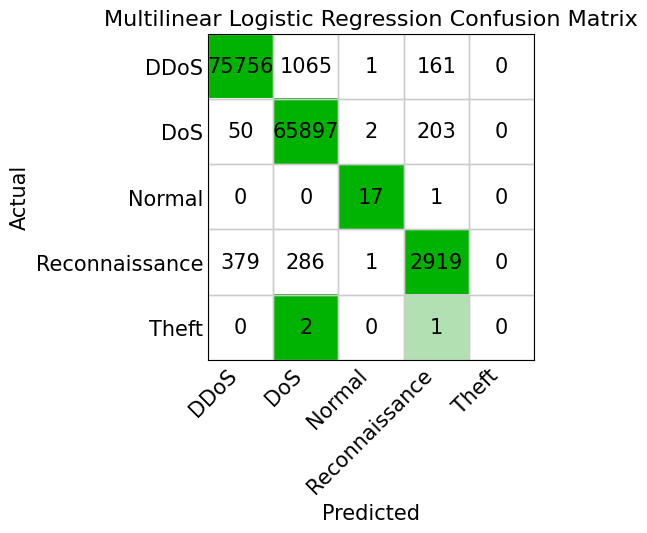

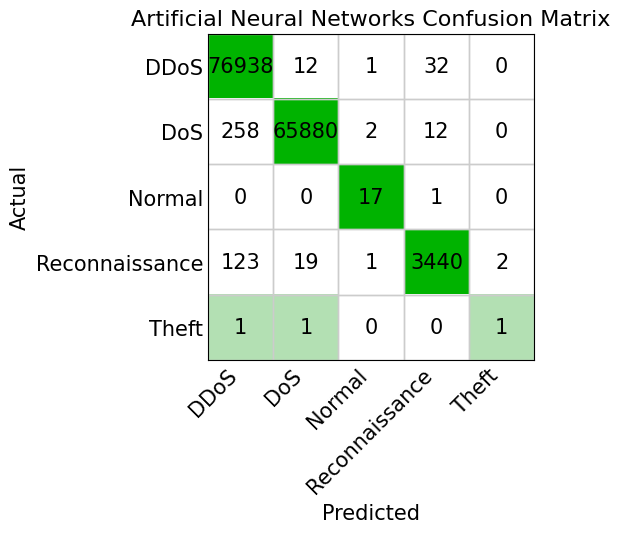

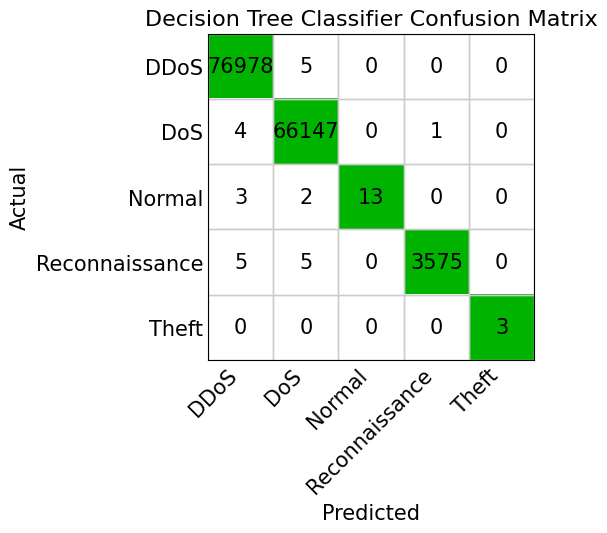

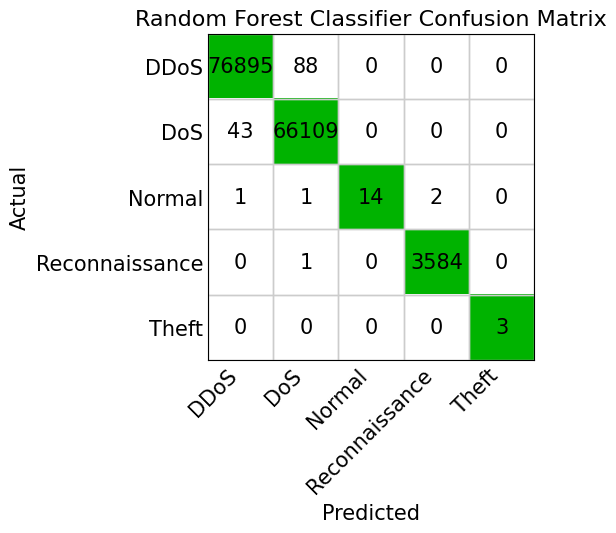

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize

for model in ["Multilinear Logistic Regression","Artificial Neural Networks","Decision Tree Classifier","Random Forest Classifier"]:

    # Define the confusion matrix
    conf_matrix = np.array(confusion_matrices[model])

    # Normalize the values in each row
    norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

    # Define the color map
    cmap = ListedColormap(['white', '#b3e0b3', '#00b300'])
    #cmap = plt.cm.get_cmap('viridis')

    # Plot the confusion matrix as a colored table
    fig, ax = plt.subplots()
    im = ax.imshow(norm_conf_matrix, cmap=cmap)

    # Adjust subplot layout
    fig.subplots_adjust(bottom=0.2, right=0.8)

    # Set the axis labels with rotated x labels
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    ax.set_xticklabels(['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft'], rotation=45, ha="right", fontsize=15)
    ax.set_yticklabels(['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft'], fontsize=15)
    ax.tick_params(axis='both', which='both', length=0)

    # Use the normalized values only for colouring cells
    # Add the values inside the cells
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black", fontsize=15)

    # Set the cell border color to gray
    for i in range(5):
        for j in range(5):
            cell = im.axes.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor='#cccccc'))


    # Set the plot title
    ax.set_title((model+" Confusion Matrix"), fontsize=16)

    # Add axis labels
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)

    # Show the colorbar
    #cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    #cbar.set_label('Normalized Values', fontsize=12)

    # Show the plot
    plt.show()


## Classification report

In [3]:
import numpy as np

# Classification reports for each model
reports = {
    "Multilinear Logistic Regression": {
        0: {'precision': 0.994369, 'recall': 0.984061, 'f1-score': 0.989188, 'support': 76983},
        1: {'precision': 0.979881, 'recall': 0.996145, 'f1-score': 0.987946, 'support': 66152},
        2: {'precision': 0.809524, 'recall': 0.944444, 'f1-score': 0.871795, 'support': 18},
        3: {'precision': 0.888584, 'recall': 0.814226, 'f1-score': 0.849782, 'support': 3585},
        4: {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}
    },
    "Artificial Neural Network": {
        0: {'precision': 0.995059, 'recall': 0.999415, 'f1-score': 0.997233, 'support': 76983},
        1: {'precision': 0.999515, 'recall': 0.995888, 'f1-score': 0.997698, 'support': 66152},
        2: {'precision': 0.809524, 'recall': 0.944444, 'f1-score': 0.871795, 'support': 18},
        3: {'precision': 0.987088, 'recall': 0.959554, 'f1-score': 0.973126, 'support': 3585},
        4: {'precision': 0.333333, 'recall': 0.333333, 'f1-score': 0.333333, 'support': 3}
    },
    "Decision Tree Classifier": {
        0: {'precision': 0.999844, 'recall': 0.999935, 'f1-score': 0.999890, 'support': 76983},
        1: {'precision': 0.999819, 'recall': 0.999924, 'f1-score': 0.999872, 'support': 66152},
        2: {'precision': 1.0, 'recall': 0.722222, 'f1-score': 0.838710, 'support': 18},
        3: {'precision': 0.999720, 'recall': 0.997211, 'f1-score': 0.998464, 'support': 3585},
        4: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}
    },
    "Random Forest Classifier": {
        0: {'precision': 0.999428, 'recall': 0.998857, 'f1-score': 0.999142, 'support': 76983},
        1: {'precision': 0.998640, 'recall': 0.999350, 'f1-score': 0.998995, 'support': 66152},
        2: {'precision': 1.0, 'recall': 0.777778, 'f1-score': 0.875000, 'support': 18},
        3: {'precision': 0.999442, 'recall': 0.999721, 'f1-score': 0.999582, 'support': 3585},
        4: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}
    }
}


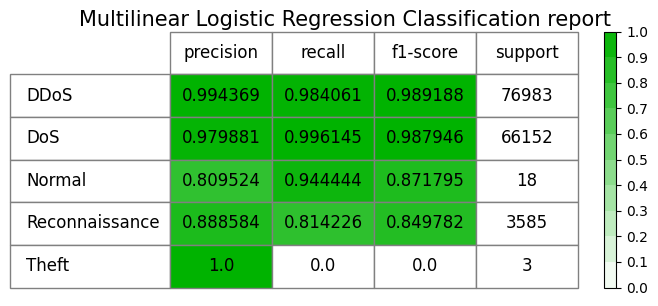

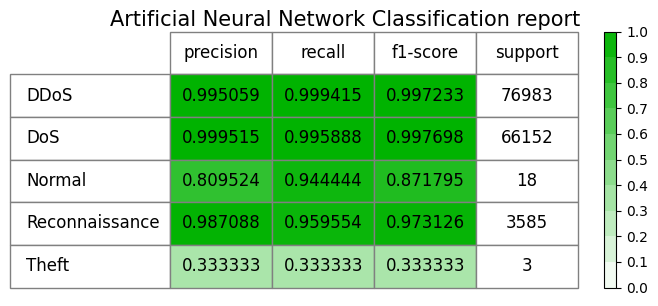

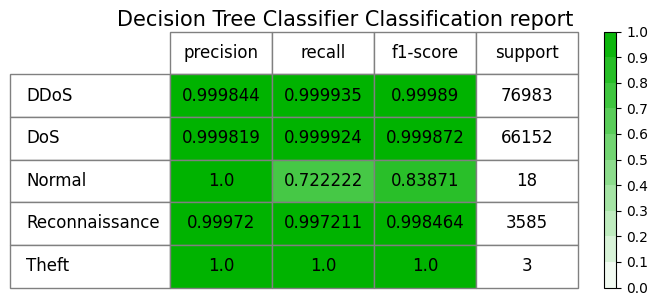

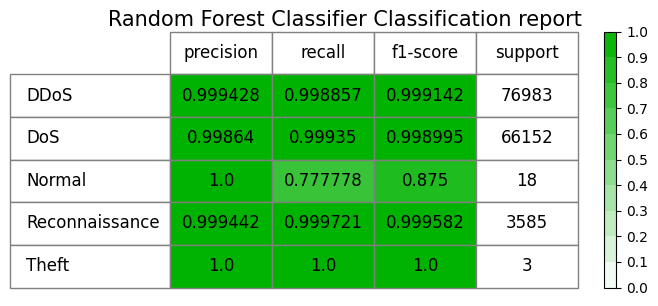

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

for model in ["Multilinear Logistic Regression","Artificial Neural Network","Decision Tree Classifier","Random Forest Classifier"]:
    # Example classification report values
    report = reports[model]

    # Define the starting and ending colors
    start_color = '#00b300'  # green
    end_color = '#FFFFFF'    # pure white

    # Generate the color map
    cmap_colors = []
    for i in range(1000):
        r = int(((999 - i) / 999) * int(end_color[1:3], 16) + (i / 999) * int(start_color[1:3], 16))
        g = int(((999 - i) / 999) * int(end_color[3:5], 16) + (i / 999) * int(start_color[3:5], 16))
        b = int(((999 - i) / 999) * int(end_color[5:], 16) + (i / 999) * int(start_color[5:], 16))
        cmap_colors.append(f'#{r:02X}{g:02X}{b:02X}')

    cmap = ListedColormap(cmap_colors[:len(cmap_colors) - 1])

    columns = ['precision','recall', 'f1-score', 'support']
    classes = ['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft']

    # Create a table with the values
    cell_text = []
    for row in range(len(classes)):
        cell_text.append([report[row][column] for column in columns])

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')

    # Add the topic label
    fig.text(0.5, 0.95, (model+" Classification report"), fontsize=15, ha='center')  ## see line 4 for model

    # Create the table and format it
    table = ax.table(cellText=cell_text,
                        colLabels=columns,
                        rowLabels=classes,
                        cellLoc='center',
                        bbox=[0, 0, 1, 1],
                        colWidths=[0.2, 0.2, 0.2, 0.2],
                        cellColours=[[cmap_colors[0]] * len(columns)] + [[cmap_colors[1]] * len(columns)] + [[cmap_colors[2]] * len(columns)]+ [[cmap_colors[3]] * len(columns)]+ [[cmap_colors[4]] * len(columns)])

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # Adjust cell padding and font properties
    for key, cell in table.get_celld().items():
        cell.set_text_props()
        if key[0] == 0:
            cell.set_fontsize(12)
        else:
            cell.set_fontsize(12)
        cell.set_height(0.15)
        cell.set_edgecolor('gray')

    # Color the cells using the colormap (for the first 3 columns)
    for i, key in enumerate(columns[:3]):
        cell_values = np.array([report[row][key] for row in range(len(classes))])
        colors = cmap(cell_values / cell_values.max())
        for j in range(len(classes)):
            table.get_celld()[j+1, i].set_facecolor(colors[j])

    # Set the last column background color to white
    for j in range(len(classes)):
        table.get_celld()[j+1, len(columns)-1].set_facecolor('white')

    # Add a colorbar with decimal number labels
    colorbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, boundaries=np.linspace(0, 1, 11))  # Use 11 boundaries for 10 bands
    colorbar.set_ticks(np.linspace(0, 1, 11))
    colorbar.set_ticklabels( [f'{i:.1f}' for i in np.linspace(0, 1, 11)])
    colorbar.ax.yaxis.set_ticks_position('right')
    colorbar.ax.tick_params(axis='y', labelsize=10)  # Set the font size of the color bar labels

    # Display the figure
    plt.tight_layout()
    plt.show()


## Accuracy Graph

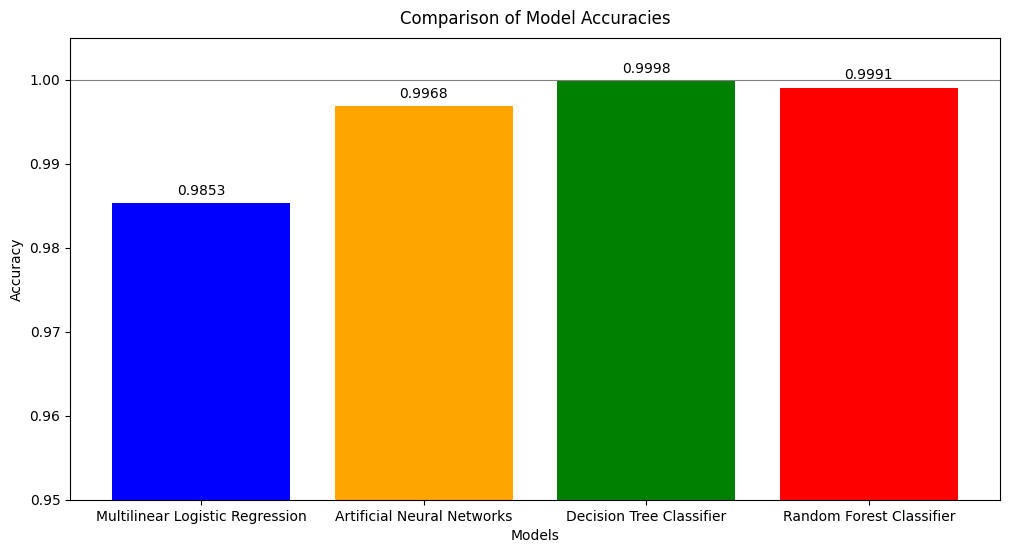

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Multilinear Logistic Regression', 'Artificial Neural Networks', 'Decision Tree Classifier', 'Random Forest Classifier']

accuracies = [0.985335, 0.996831, 0.999830, 0.999073]

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

# Set y-axis range
plt.ylim(0.95, 1.005)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies', pad=10)  # Set pad to move title above 1.0


# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.4f}', ha='center')

plt.axhline(y=1.0, color='gray', linestyle='-', linewidth=0.8)

# Show the plot
plt.show()


## Confusion matrix - Non normalised colours

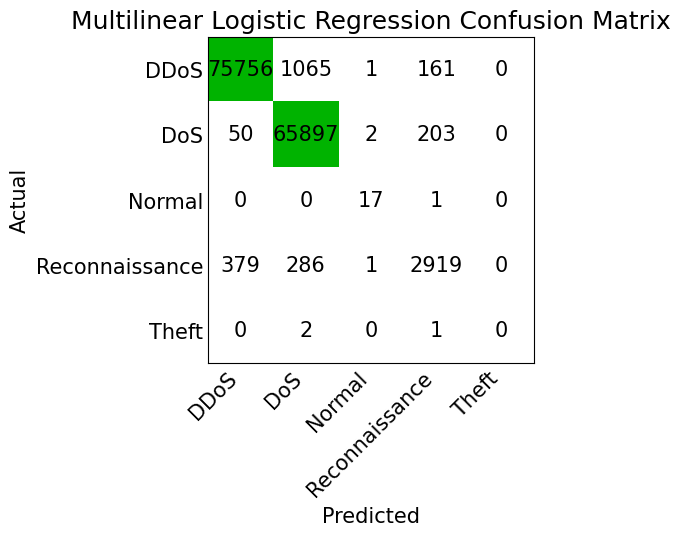

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the confusion matrix
conf_matrix = np.array([[75756, 1065, 1, 161, 0],
                       [50, 65897, 2, 203, 0],
                       [0, 0, 17, 1, 0],
                       [379, 286, 1, 2919, 0],
                       [0, 2, 0, 1, 0]])

# Define the color map
cmap = ListedColormap(['white', '#00b300', '#00b300'])

# Plot the confusion matrix as a colored table
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap=cmap)

# Adjust subplot layout
fig.subplots_adjust(bottom=0.2, right=0.8)

# Set the axis labels with rotated x labels
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft'], rotation=45, ha="right", fontsize=15)
ax.set_yticklabels(['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft'], fontsize=15)
ax.tick_params(axis='both', which='both', length=0)

# Add the values inside the cells
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black", fontsize=15)

# Set the plot title
ax.set_title('Multilinear Logistic Regression Confusion Matrix', fontsize=18)

# Add axis labels
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

# Show the plot
plt.show()
